## Recommender System with Python
In this notebook, we will focus on providing a basic  recommendation system by suggestings item that  are most similar to a particular item, in this case movies. Keep in mind that, this is not a robust documentation system, to describe it more accurately it just tells what movies you, what movies/items similar to your choice

## Import Libraries

In [2]:

import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as  plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## Get the data

In [4]:
column_names = ['user_id','item_id','rating','timestamp']

In [5]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movie_titles = pd.read_csv('Movie_Id_Titles')

print(movie_titles.head(10))

   item_id                                              title
0        1                                   Toy Story (1995)
1        2                                   GoldenEye (1995)
2        3                                  Four Rooms (1995)
3        4                                  Get Shorty (1995)
4        5                                     Copycat (1995)
5        6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6        7                              Twelve Monkeys (1995)
7        8                                        Babe (1995)
8        9                            Dead Man Walking (1995)
9       10                                 Richard III (1995)


We are merging both the dataframe

In [8]:
df = pd.merge(df,movie_titles,on='item_id',indicator=False)

In [9]:
df.head(10)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies

create a ratings dataframe with average ratings and number of strings

In [16]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [21]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head(10)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


Now  set the numbers of ratings columns

In [31]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(10)

,rating,Numbers of ratings,number of ratings
title,,,
'Til There Was You (1997),2.333333,9,9
1-900 (1994),2.600000,5,5
101 Dalmatians (1996),2.908257,109,109
12 Angry Men (1957),4.344000,125,125
187 (1997),3.024390,41,41
2 Days in the Valley (1996),3.225806,93,93
"20,000 Leagues Under the Sea (1954)",3.500000,72,72
2001: A Space Odyssey (1968),3.969112,259,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5,5


Now, let's plot few histogram

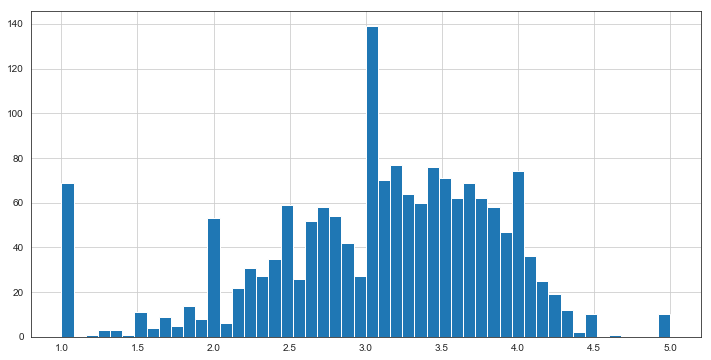

In [32]:
plt.figure(figsize=(12,6))
ratings['rating'].hist(bins=50)

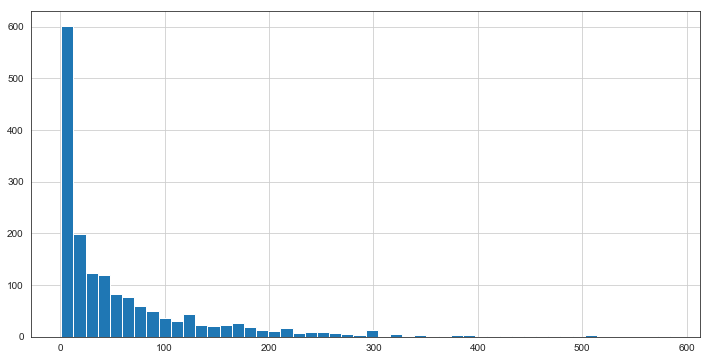

In [33]:
plt.figure(figsize=(12,6))
ratings['number of ratings'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

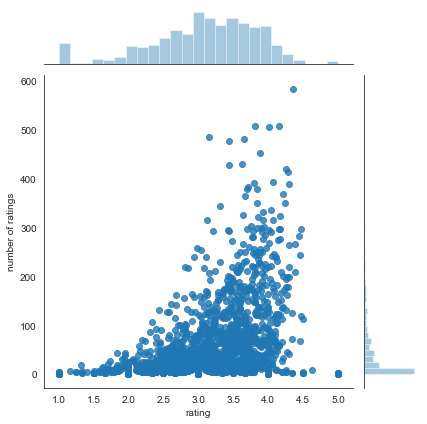

In [38]:
plt.figure(figsize=(8,6))
sns.jointplot(y='number of ratings',x='rating',data=ratings,alpha=0.8)

Now, we have a general idea of what the data looks like, let's move on to create the simple recommender system.

## Recommending similar movies

Now let's create a matrix that has user id as index and movie title as columns, Each cell will consists of ratings user gave
to the movies. Note that there will be lot of nan values, because most of the people have not seen most of the movies.

In [41]:
movie_mat = df.pivot_table(index='user_id',columns='title',values='rating')
movie_mat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most Rated Movies

In [46]:
ratings.sort_values('number of ratings',ascending=False).head(10)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [47]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


now lets choose two movies Star Wars and Liar Liar and grab the users ratings for two movies

In [53]:
star_war_ratings = movie_mat['Star Wars (1977)']
liar_liar_ratings = movie_mat['Liar Liar (1997)']
star_war_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [54]:
liar_liar_ratings.head(5)

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

Now we can use corrwith() to get correaltion between two pandas series.

In [68]:
similar_to_starwars = movie_mat.corrwith(star_war_ratings)
similar_to_liarliar = movie_mat.corrwith(liar_liar_ratings)

C:\Users\reque\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\reque\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [69]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

Now let's clean the nan values and use dataframe instead of series

In [70]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however we get some results which doesn't
make sense. Because there are lots of movies only wathed once by users who also watched the starwars(it is the most 
popular movies)

In [81]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation,number of ratings
title,,
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Man of the Year (1995),1.0,9
Hollow Reed (1996),1.0,6
"Beans of Egypt, Maine, The (1994)",1.0,2
"Good Man in Africa, A (1994)",1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5


Now let's fix this by filtering out movies less than  100 reviews(this values was chosen based off the histogram from earlier)

In [72]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])

In [73]:
corr_starwars.head()

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the title makes lot more sense:

In [77]:
corr_starwars[corr_starwars['number of ratings']>=100].sort_values('correlation',ascending=False).head()

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now same for the comedy liar liar

In [79]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['number of ratings'])
corr_liarliar[corr_liarliar['number of ratings']>=100].sort_values('correlation',ascending=False).head(10)

,correlation,number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


### Thank You!!